In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load and prepare the data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Random Forests



**Random Forest** is an extension of Bagging that introduces an extra layer of randomness.

### Key Difference from Bagging:
- While Bagging uses full feature set per split, **Random Forests use a random subset of features** for each split in the tree.

### Advantages:
- Further reduces correlation between base learners.
- Performs automatic feature selection.
- Reduces overfitting compared to single Decision Tree.

### Mathematical Difference:
In Random Forest:
- At each node, a random subset of features of size $m \leq M$ is considered.
- For classification, typically $m = \sqrt{M}$
- For regression, $m = M/3$

This random feature selection reduces correlation $\rho$ between trees, which further reduces ensemble variance.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit and predict
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



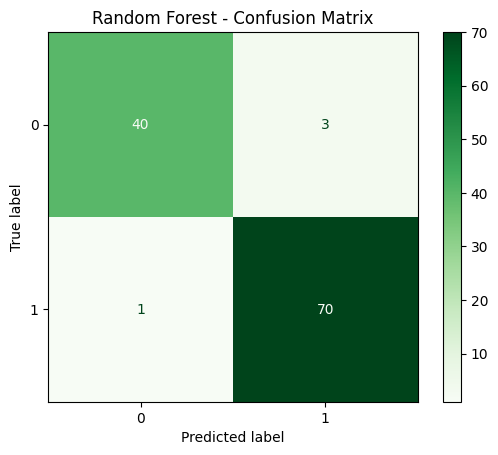

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [ ]:
y_score_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

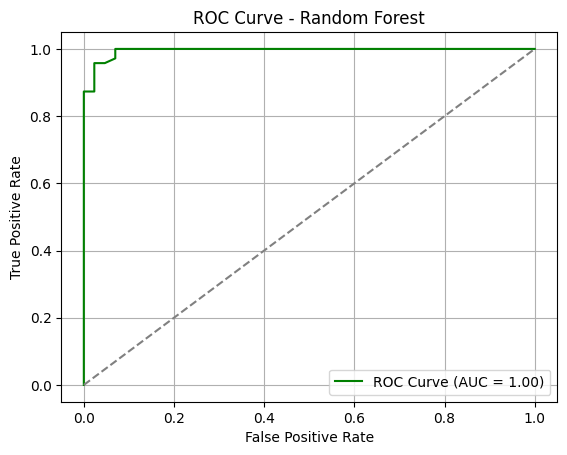

In [ ]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

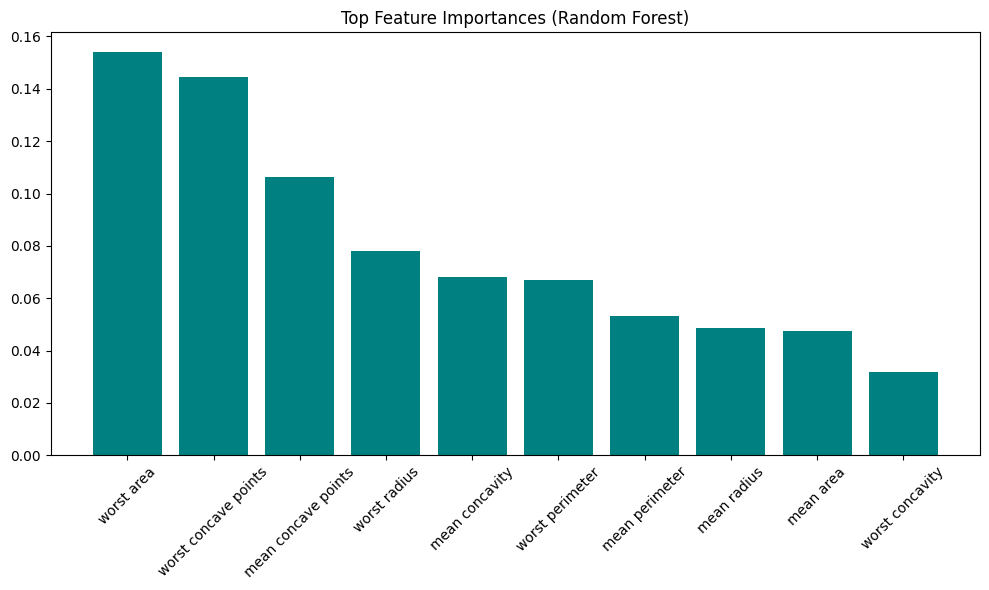

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices[:10]], color='teal', align='center')
plt.xticks(range(10), X.columns[indices[:10]], rotation=45)
plt.tight_layout()
plt.show()

### Interpretation: Random Forest

- **Feature Importance**: Shows which features influence predictions the most.
- **ROC Curve**: Indicates strong class separability.
- **Why better than Bagging?**
  - Random Forest reduces **tree correlation** by randomly selecting features per split, further improving generalization.
  - Performs **automatic feature selection** internally.

> Ideal when you want a strong model with minimal tuning, especially for high-dimensional tabular data.


### Bagging vs Random Forests

| Feature                  | Bagging                         | Random Forests                  |
|--------------------------|----------------------------------|----------------------------------|
| Feature Subsets          | All features                    | Random subset at each split     |
| Tree Correlation         | Higher                          | Lower                           |
| Overfitting Risk         | Slightly higher                 | Lower                           |
| Interpretability         | Medium                          | Medium                          |
| Feature Importance       | No                              | Yes                             |


### Summary: Random Forest

Let’s extend the “asking friends” analogy:

- Now, instead of just asking the same question to 10 friends, you ask **different types of questions** to each one — like genre, mood, time of day, etc.
- This adds **diversity** in their answers, reducing the chance they all recommend the same type of movie.

That’s what Random Forest does:
- It builds many **randomized decision trees**.
- Each tree sees different data **and** different features.
- Their combined result is more stable and robust.

It's like having a **committee of experts**, each looking at the problem from a slightly different angle.


## 3. Boosting: Gradient Boosting



**Boosting** is an ensemble method that combines weak learners **sequentially**. Each learner tries to correct the mistakes of the previous one.

### Gradient Boosting:
- It builds trees **one after another**, minimizing a **loss function** using gradient descent.
- Instead of training independently like Bagging, each tree focuses on residuals of previous model.

### Intuition:
Let $F_0(x)$ be the initial prediction (e.g., mean for regression).
Each iteration:
1. Compute pseudo-residuals: $r_i = -\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}$
2. Fit tree $h_m(x)$ to $r$
3. Update model: $F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)$

Where:
- $\eta$ = learning rate
- $L$ = loss function (e.g., log loss or MSE)

### Key Characteristics:
- Reduces both bias and variance.
- Can overfit if too many trees or low regularization.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
# Fit and predict
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb = gb_clf.predict(X_test_scaled)

print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy (Gradient Boosting): 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



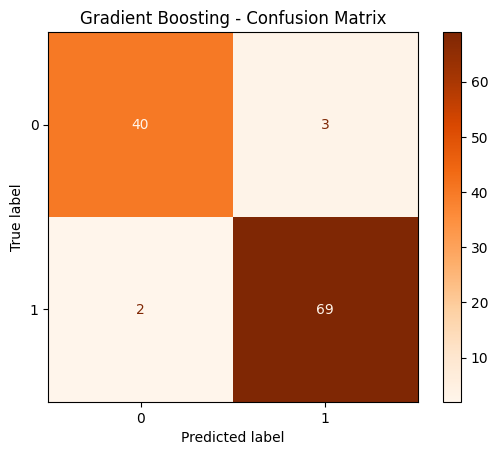

In [ ]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb_clf.classes_)
disp_gb.plot(cmap='Oranges')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

In [ ]:
y_score_gb = gb_clf.predict_proba(X_test_scaled)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

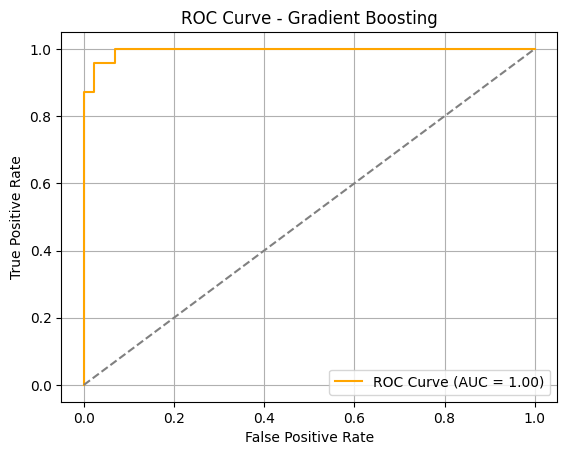

In [ ]:
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='orange', label=f'ROC Curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation: Gradient Boosting

- **Higher ROC AUC** indicates precise learning of decision boundaries.
- **Often beats Bagging/RF** in accuracy with proper tuning.
- **Risks**: Gradient Boosting is prone to **overfitting** if too many trees or a high learning rate are used.

> Gradient Boosting trades off more training time and complexity for typically **better predictive performance**.


### Summary: Gradient Boosting

Imagine you're teaching a child to solve math problems.

- The child gets the first few problems wrong.
- Instead of restarting, you help them **focus only on the mistakes**.
- Over time, they get better and better because each lesson **corrects the errors from the previous one**.

That’s Gradient Boosting:
- It builds one model at a time.
- Each new model **focuses on fixing the mistakes** made by the previous ones.
- This results in a powerful final model that’s very good at capturing patterns.

Boosting is like **step-by-step tutoring** where every next step learns from previous failures.


## Comparative Summary

| Technique         | Learner Type    | Model Building | Handles Bias | Handles Variance | Overfitting Risk |
|------------------|------------------|----------------|---------------|------------------|------------------|
| Bagging           | Parallel         | Independent     | No             | Yes                | Low              |
| Random Forest     | Parallel         | Independent     | No             | Yes              | Lower            |
| Gradient Boosting | Sequential       | Dependent       | Yes           | Yes                | Medium–High      |

- **Bagging** is best for variance reduction (unstable models).
- **Random Forest** improves Bagging by decorrelating trees.
- **Gradient Boosting** is more aggressive and effective but can overfit without tuning.
